In [1]:
import pandas as pd
df = pd.read_csv('COVID19 file.csv')
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [2]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [3]:
df.isnull().sum()
# null values found in the data set

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

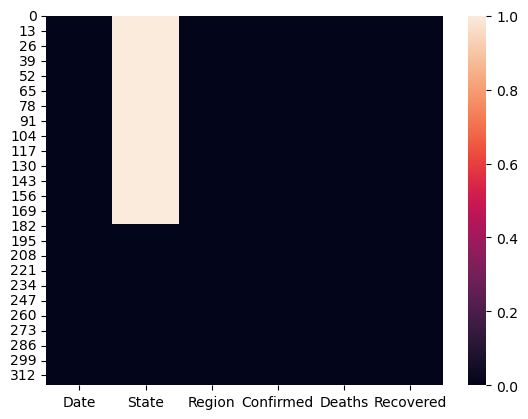

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
# number of confirmed deaths and recovered cases in each region
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [7]:
df.groupby('Region').sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


In [8]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(20)

#shows from the largest confirmed number to the smallest

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

In [9]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=True)
#shows from the smallest confirmed number to the largest

Region
Yemen                          6
Western Sahara                 6
Bhutan                         7
Papua New Guinea               8
Sao Tome and Principe          8
                          ...   
UK                        166441
France                    166543
Italy                     203591
Spain                     236899
US                       1039909
Name: Confirmed, Length: 187, dtype: int64

In [11]:
# removing records with confirmed cases is less than 10
df[-(df.Confirmed<10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [12]:
#making the changes permanetly
df=df[-(df.Confirmed<10)]
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [13]:
# regions with the highest number of confimed casses recorded
df.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

In [14]:
#region with minimumm number of deaths cases were recorded
df.groupby('Region').Deaths.sum().sort_values(ascending = True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

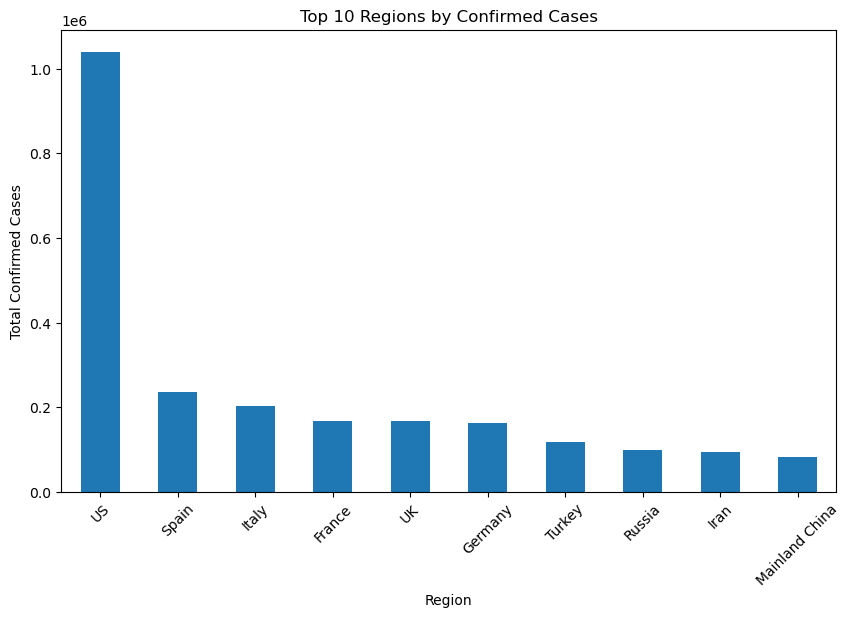

In [21]:
import matplotlib.pyplot as plt
top_10_regions = df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

top_10_regions.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Region')
plt.ylabel('Total Confirmed Cases')
plt.title('Top 10 Regions by Confirmed Cases')

plt.xticks(rotation=45)
plt.show()

In [15]:
# deaths and recovered cases reported from Kenya till 29th April2020
df[df.Region == 'Kenya']

,Date,State,Region,Confirmed,Deaths,Recovered
86,4/29/2020,NaN,Kenya,384,15,129


In [28]:
#sort the entire data number of confirmed cases in ascedning order
df.sort_values (by = ['Confirmed'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
265,4/29/2020,New York,US,299691,23477,0
153,4/29/2020,NaN,Spain,236899,24275,132929
80,4/29/2020,NaN,Italy,203591,27682,71252
168,4/29/2020,NaN,UK,165221,26097,0
57,4/29/2020,NaN,France,165093,24087,48228
...,...,...,...,...,...,...
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
59,4/29/2020,NaN,Gambia,10,1,8
156,4/29/2020,NaN,Suriname,10,1,8


In [29]:
df.sort_values (by = ['Recovered'], ascending = False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
78,4/29/2020,NaN,Ireland,20253,1190,13386


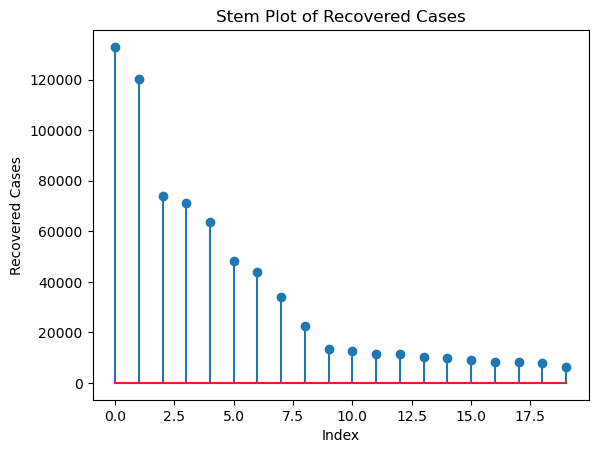

In [34]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values(by=['Recovered'], ascending=False).head(20)

recovered_values = sorted_df['Recovered'].values

plt.stem(recovered_values)
plt.xlabel('Index')
plt.ylabel('Recovered Cases')
plt.title('Stem Plot of Recovered Cases')
plt.show()